# Time Series Modeling (ARIMA Methods) Assignment

In [1]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
def iline(df, x, y, groups=None, title=''):
    fig = px.line(df, x=x, y=y, color=groups, title=title, 
                  template='none')
    fig.show()

### Import the Amazon stock price data set (AMZN_data.csv) and plot a line chart with the observed daily closing prices.

In [3]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%204/AMZN_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [4]:
#Dates and object and a date, but what kind of date? Also, I only need the closing prices.
ap = df[['date', 'close']].copy()
ap.head()

date   close
0  2013-02-08  261.95
1  2013-02-11  257.21
2  2013-02-12  258.70
3  2013-02-13  269.47
4  2013-02-14  269.24

In [5]:
#date-month-year format (not epoch, so I'm good)
ap['date'] = pd.to_datetime(ap['date'])
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   close   1259 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


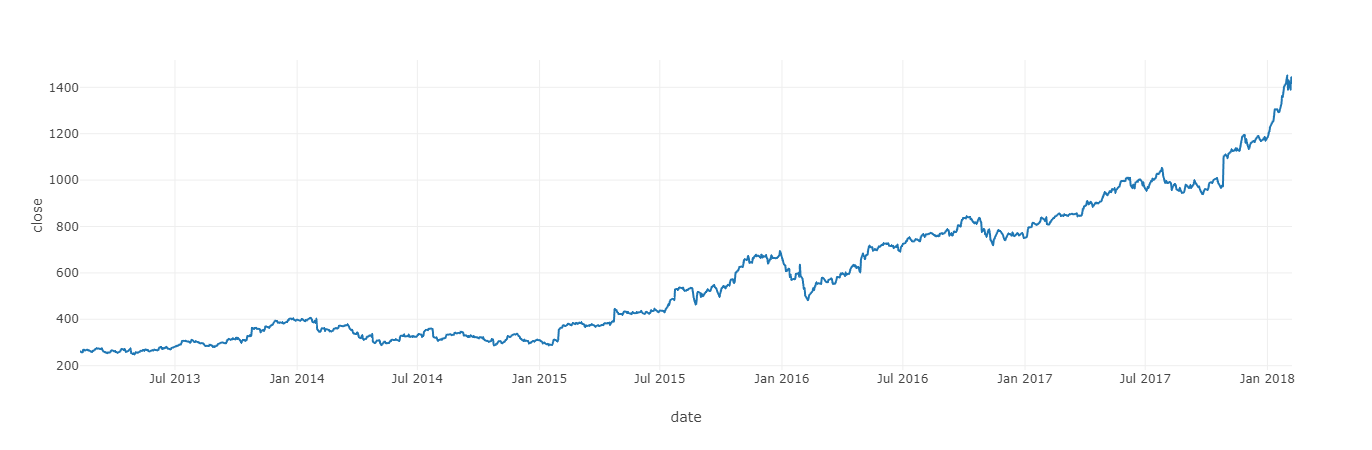

In [6]:
iline(ap, 'date', 'close')

### Run an Autoregression (AR) model on the series and add the results to a column in the dataframe.

In [7]:
def chart(df, vars):
   
   vars = list(vars)
   vars.append('close')
   chart = pd.melt(df, id_vars='date', value_vars=vars, 
                 var_name='Variable', value_name='Value')

   iline(chart, 'date', 'Value', groups='Variable', title='Moving Average Comparison')

In [8]:
# AR
model = AR(df['close']).fit()
ap['AR'] = model.predict()
p = model.k_ar
p

C:\Users\kalik\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




23

### Plot a multi-line chart comparing the AR model's results with the observed values.

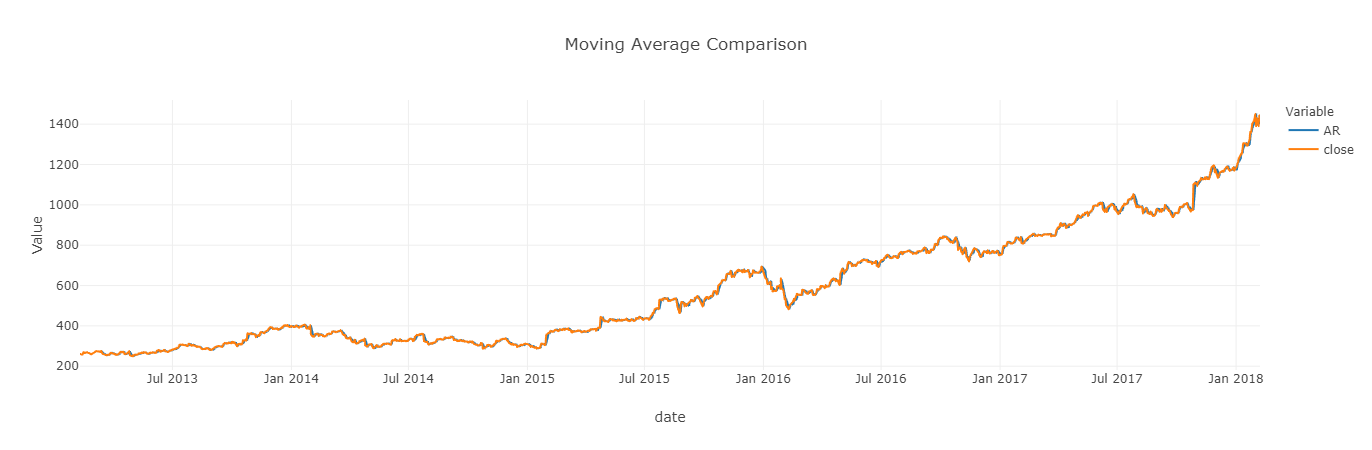

In [9]:
chart(ap, ['AR'])

### Run a Moving Average (MA) model on the series and add the results to a column in the dataframe.

In [10]:
# Moving Average
model = ARMA(ap['close'], order=(0,1)).fit()
ap['MA'] = model.predict()
print(model.summary())

C:\Users\kalik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                 1259
Model:                     ARMA(0, 1)   Log Likelihood               -8047.769
Method:                       css-mle   S.D. of innovations            144.300
Date:                Thu, 17 Dec 2020   AIC                          16101.538
Time:                        12:01:02   BIC                          16116.952
Sample:                             0   HQIC                         16107.331
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         576.9865      8.063     71.561      0.000     561.184     592.789
ma.L1.close     0.9834      0.004    226.360      0.000       0.975       0.992
                                    Roots       

### Print the model summary and add the model's results to the line chart with observations and the AR model results.

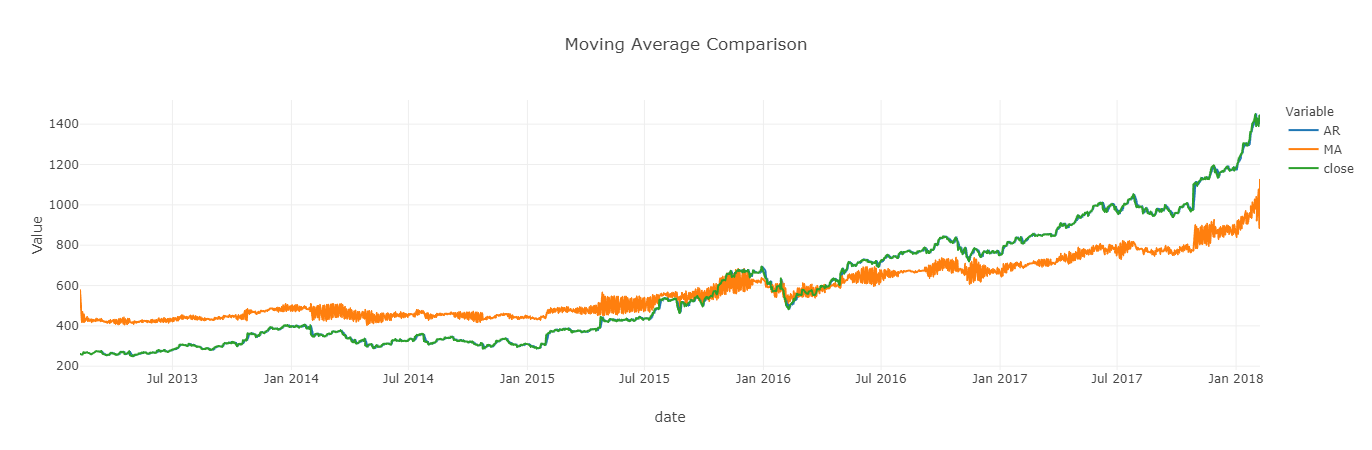

In [11]:
chart(ap, ['AR', 'MA'])

### Run an Autoregressive Moving Average (ARMA) model on the series and add the results to a column in the dataframe.

Hint: You will need to make the time series stationary in order to run the ARMA model on it. The most common way to do this is by differncing, or subtracting the previous observed value from the current one.

In [12]:
ap['diff'] = ap['close'] - ap['close'].shift()
ap['diff'].fillna(0, inplace=True)

In [13]:
# ARMA
model = ARMA(ap['diff'], order=(p,1)).fit()
ap['shift'] = ap['close'].shift()
ap['ARMA'] = model.predict() + ap['shift']
print(model.summary())

C:\Users\kalik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                 1259
Model:                    ARMA(23, 1)   Log Likelihood               -4726.237
Method:                       css-mle   S.D. of innovations             10.329
Date:                Thu, 17 Dec 2020   AIC                           9504.474
Time:                        12:04:01   BIC                           9638.064
Sample:                             0   HQIC                          9554.677
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9413      0.354      2.659      0.008       0.247       1.635
ar.L1.diff     -0.0420      0.503     -0.084      0.933      -1.028       0.943
ar.L2.diff      0.0311      0.029      1.069    

### Print the model summary and generate a multi-line chart that compares the ARMA model's results with those from the AR and MA models.

Hint: You will need to de-difference the model results by adding the previous observed values to them.

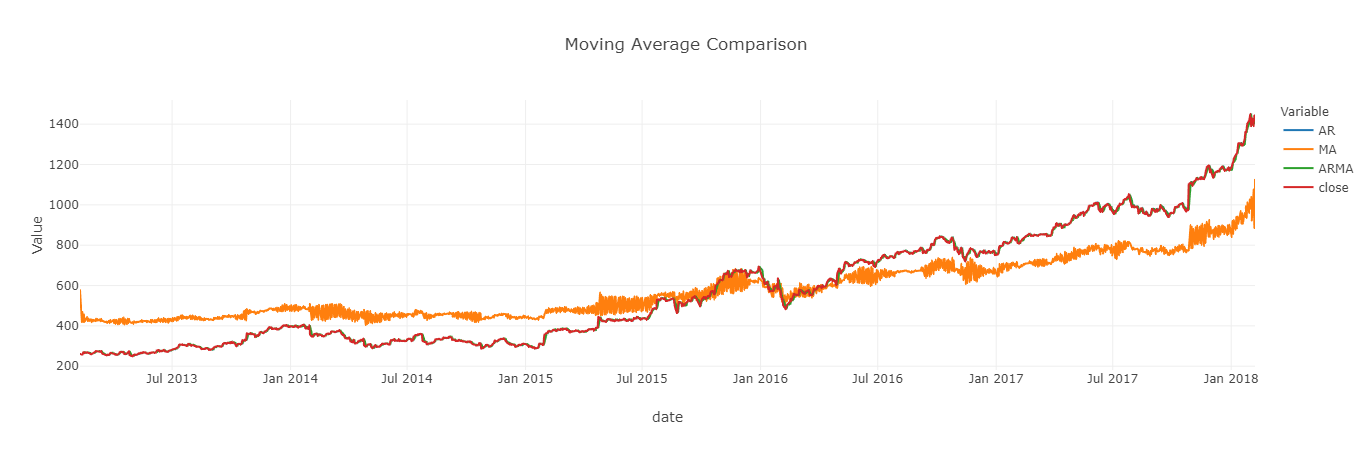

In [14]:
chart(ap, ['AR', 'MA', 'ARMA'])

### Run an Autoregressive Integrated Moving Average (ARIMA) model on the series and add the results to a column in the dataframe.

In [15]:
model = ARIMA(ap['close'], order=(p,1,1)).fit()
ap['ARIMA'] = model.predict(typ='levels')
print(model.summary())

C:\Users\kalik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


C:\Users\kalik\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 1258
Model:                ARIMA(23, 1, 1)   Log Likelihood               -4722.983
Method:                       css-mle   S.D. of innovations             10.333
Date:                Thu, 17 Dec 2020   AIC                           9497.965
Time:                        12:09:55   BIC                           9631.534
Sample:                             1   HQIC                          9548.162
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9410      0.354      2.656      0.008       0.246       1.636
ar.L1.D.close     -0.0419      0.503     -0.083      0.934      -1.027       0.944
ar.L2.D.close      0.0311      0.029

### Print the model summary and generate a multi-line chart that compares the ARIMA model's results to the observed values.

In [16]:
models = {'AR', 'MA', 'ARMA'}
models.add('ARIMA')

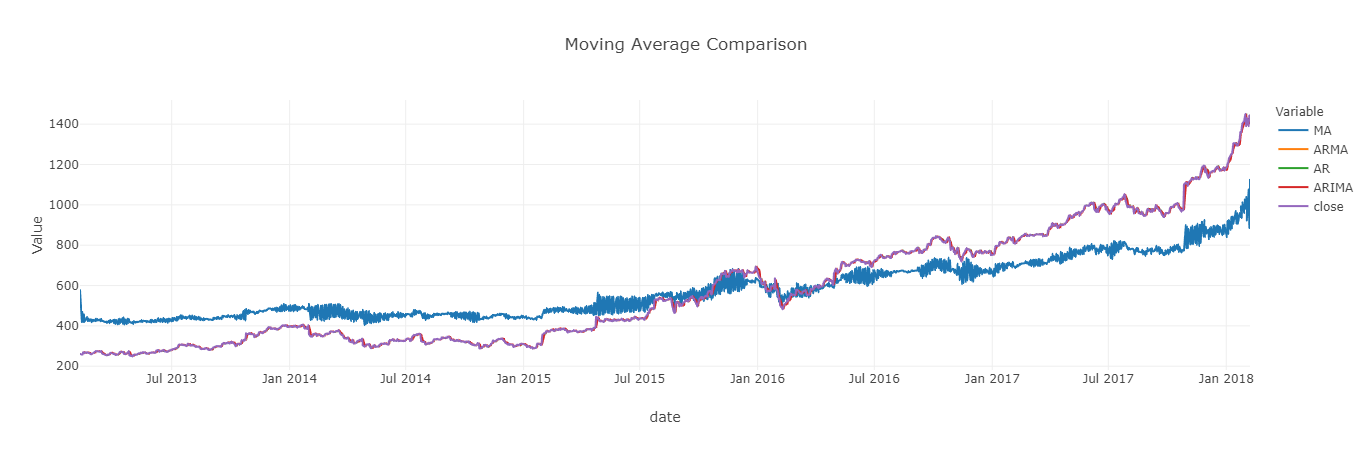

In [17]:
chart(ap, models)

### Run an Seasonal Autoregressive Integrated Moving Average (SARIMA) model on the series and add the results to a column in the dataframe.

In [18]:
model = SARIMAX(ap['close'], order=(1, 1, 1), seasonal_order=(1,1,1,2)).fit()
ap['SARIMA'] = model.predict()
models.add('SARIMA')
print(model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             close   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -4732.272
Date:                           Thu, 17 Dec 2020   AIC                           9474.544
Time:                                   12:12:25   BIC                           9500.222
Sample:                                        0   HQIC                          9484.195
                                          - 1259                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0059     86.658   6.83e-05      1.000    -169.841     169.853
ma.L1         -0.0143     86.654     -0.000

### Print the model summary and generate a multi-line chart that compares the SARMA model's results with the observed values.

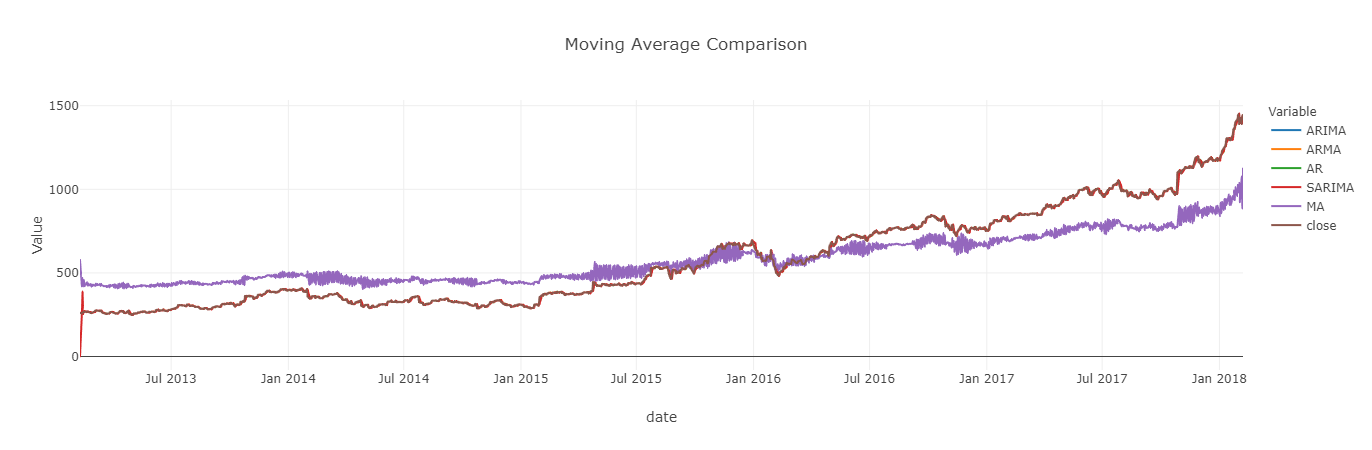

In [19]:
chart(ap, models)

### Run an Seasonal Autoregressive Integrated Moving Average with Exogenous Factors (SARIMAX) model on the series and add the results to a column in the dataframe.

Use the daily Open prices as the exogenous factors.

In [20]:
ap['open'] = df['open']

model = SARIMAX(ap['close'], exog=ap['open'], order=(1, 1, 1), seasonal_order=(0,0,0,0)).fit()
ap['SARIMAX'] = model.predict()
models.add('SARIMAX')
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -4452.470
Date:                Thu, 17 Dec 2020   AIC                           8912.941
Time:                        12:12:27   BIC                           8933.490
Sample:                             0   HQIC                          8920.663
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
open           0.9996      0.001   1609.748      0.000       0.998       1.001
ar.L1          0.0074      0.015      0.501      0.616      -0.021       0.036
ma.L1         -1.0000      0.702     -1.425      0.1

### Print the model summary and generate a multi-line chart that compares the SARMAX model's results with the SARIMA model's values.

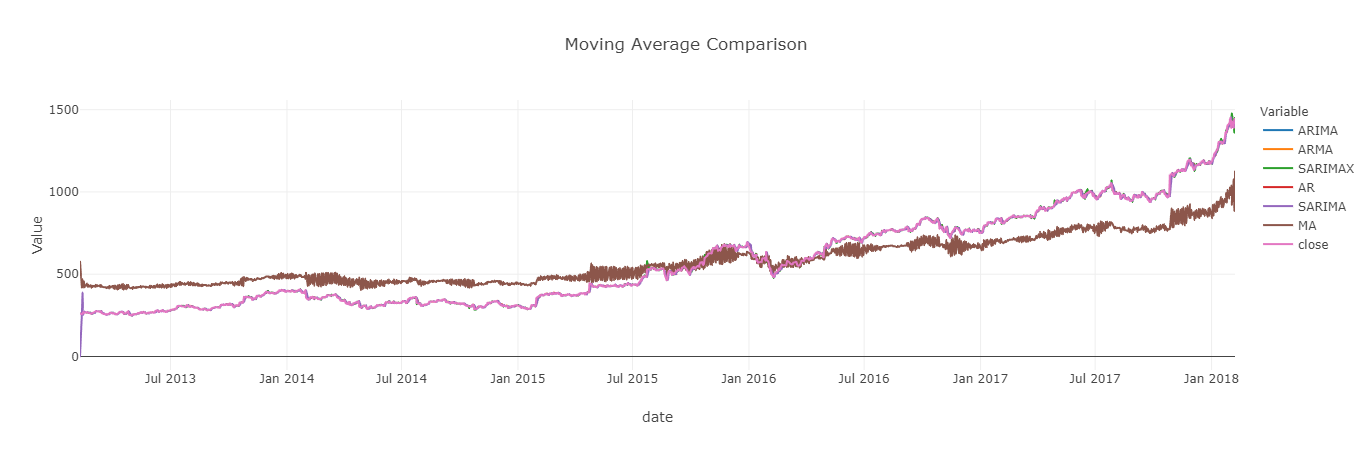

In [21]:
chart(ap, models)

### Evaluate the performance of all the models and compare to each other, using Mean Absolute Error and Root Mean Squared Error as your evaluation metrics.

In [26]:
import numpy as np
for name in list(models):
    diff = ap['close'] - ap[name]
    mae = diff.abs().mean()
    rmse = np.sqrt(np.mean(diff**2))
    print(f'Model {name} - MAE: {mae} | RMSE: {rmse}')

Model ARIMA - MAE: 6.5753461255623815 | RMSE: 10.335915327859313
Model ARMA - MAE: 6.574598011087246 | RMSE: 10.33299359581091
Model SARIMAX - MAE: 5.553637346212359 | RMSE: 8.317116166659927
Model AR - MAE: 6.636754781948509 | RMSE: 10.399040851606218
Model SARIMA - MAE: 6.911950510757987 | RMSE: 13.295800264158556
Model MA - MAE: 124.57819724584328 | RMSE: 144.63074057285823


In [ ]:
models